# Ninapro DB2 Dataset Preparation Pipeline

In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

In [2]:
path = "Ninapro_DB2"

In [3]:
subject_info = pd.read_csv(path+"/Ninapro_DB2_SubjectsInformation.csv")
subject_info

,Title,Hand,Laterality,Gender,Age,Height,Weight,zip files
0,1,Intact,Right Handed,Male,29,187,75,DB2_s1.zip
1,2,Intact,Right Handed,Male,29,183,75,DB2_s2.zip
2,3,Intact,Right Handed,Male,31,174,69,DB2_s3.zip
3,4,Intact,Left Handed,Female,30,154,50,DB2_s4.zip
4,5,Intact,Right Handed,Male,25,175,70,DB2_s5.zip
5,6,Intact,Right Handed,Male,35,172,79,DB2_s6.zip
6,7,Intact,Right Handed,Male,27,187,92,DB2_s7.zip
7,8,Intact,Right Handed,Male,45,173,73,DB2_s8.zip
8,9,Intact,Right Handed,Male,23,172,63,DB2_s9.zip
9,10,Intact,Right Handed,Male,34,173,84,DB2_s10.zip


In [4]:
mat = loadmat(path+'/'+'S1_E1_A1.mat')

In [44]:
mat['emg'].shape

(1808331, 12)

In [6]:
def read_mat(file):
    mat = loadmat(file)
    inclin = mat['inclin']
    stimulus = mat['stimulus']
    repetition = mat['repetition']
    emg = mat['emg']
    emg_col = []
    for i in range(1,13):
        emg_col.append('emg'+str(i))
    df = pd.DataFrame(columns=['repetition','inclin']+emg_col+['stimulus'])
    df['repetition'] = mat['repetition'].reshape((mat['repetition'].shape[0],))
    df['stimulus'] = stimulus
    df['inclin'] = inclin
    df[emg_col] = mat['emg']
    return df

In [7]:
fdf = read_mat(path+'/'+'S1_E1_A1.mat')

In [8]:
fdf

,repetition,inclin,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,emg9,emg10,emg11,emg12,stimulus
0,0,60.424751,-0.000003,3.355261e-06,1.598866e-06,-1.394234e-06,-0.000002,2.749975e-06,-2.347791e-06,1.537436e-07,-2.484787e-07,1.469924e-06,-5.609089e-06,0.000040,0
1,0,60.424751,-0.000005,3.355212e-06,1.430441e-06,-3.072682e-06,-0.000003,2.246543e-06,-1.657156e-07,2.503453e-06,-3.561109e-07,2.478162e-06,-3.259393e-06,0.000050,0
2,0,60.424751,-0.000003,4.026560e-06,9.263165e-07,-5.422526e-06,-0.000004,1.239568e-06,2.352061e-06,5.524560e-06,-2.445606e-07,2.479306e-06,-7.045269e-08,0.000047,0
3,0,60.424751,0.000002,2.851566e-06,7.578904e-07,-6.597427e-06,-0.000004,1.575385e-06,2.016400e-06,5.188681e-06,1.094450e-06,2.816148e-06,1.439995e-06,0.000032,0
4,0,60.424751,0.000004,6.694763e-07,1.764409e-06,-5.422437e-06,-0.000006,7.362596e-07,8.414949e-07,8.244234e-07,1.154750e-06,2.817293e-06,9.700835e-08,0.000014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808326,6,4.105899,-0.000077,-3.075891e-05,-1.203220e-05,-3.283249e-06,-0.000004,2.854926e-07,-2.805851e-07,-8.906829e-06,-4.269690e-06,-2.373901e-06,-3.945436e-06,0.000126,17
1808327,6,4.108962,-0.000032,-2.370903e-05,-1.136081e-05,-2.275687e-06,-0.000001,2.131741e-06,-3.637238e-06,-3.032428e-06,-1.286812e-06,3.116866e-07,-3.274191e-06,0.000191,17
1808328,6,4.112024,0.000047,-9.441634e-06,-6.493177e-06,-5.967306e-07,-0.000001,7.888525e-07,-2.965508e-06,5.191863e-06,1.435965e-06,5.347164e-06,-1.931549e-06,0.000167,17
1808329,6,4.115087,0.000095,2.475874e-06,-1.625549e-06,2.429787e-07,-0.000004,-2.736076e-06,-3.300879e-06,6.702186e-06,2.129538e-06,6.857807e-06,-1.260306e-06,0.000085,17


In [9]:
np.save('prepared_data/s1_raw_emg',fdf[['emg1','emg2','emg3','emg4','emg5','emg6','emg7','emg8']])
np.save('prepared_data/s1_raw_stimulus',fdf[['stimulus']])

<AxesSubplot:>

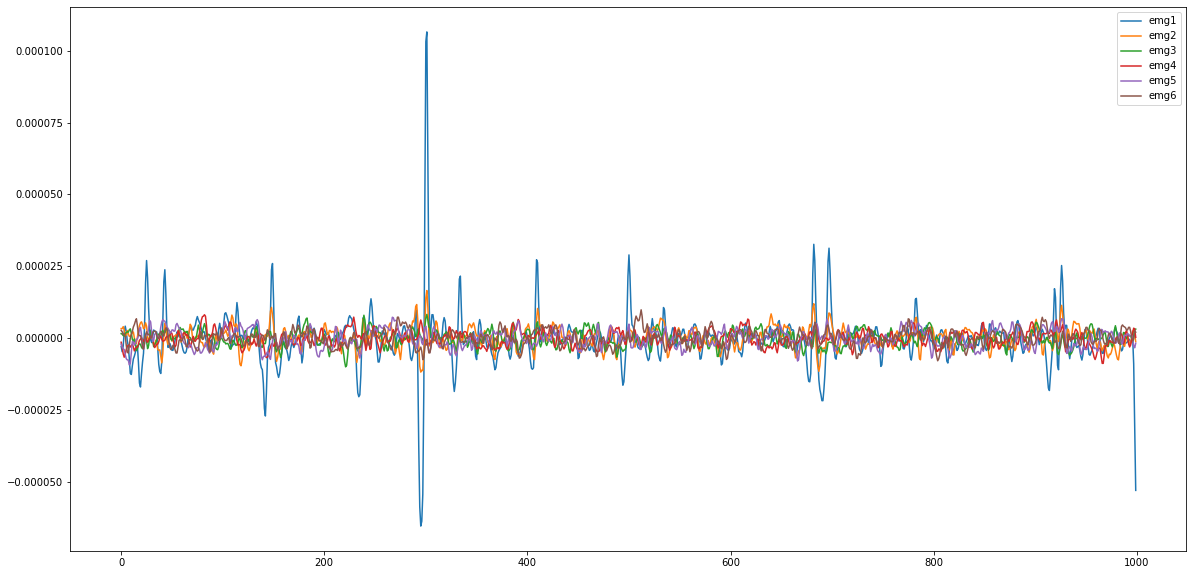

In [10]:
h = fdf.head(1000)
h[['emg1','emg2','emg3','emg4','emg5','emg6']].plot(figsize=(20,10))

<AxesSubplot:>

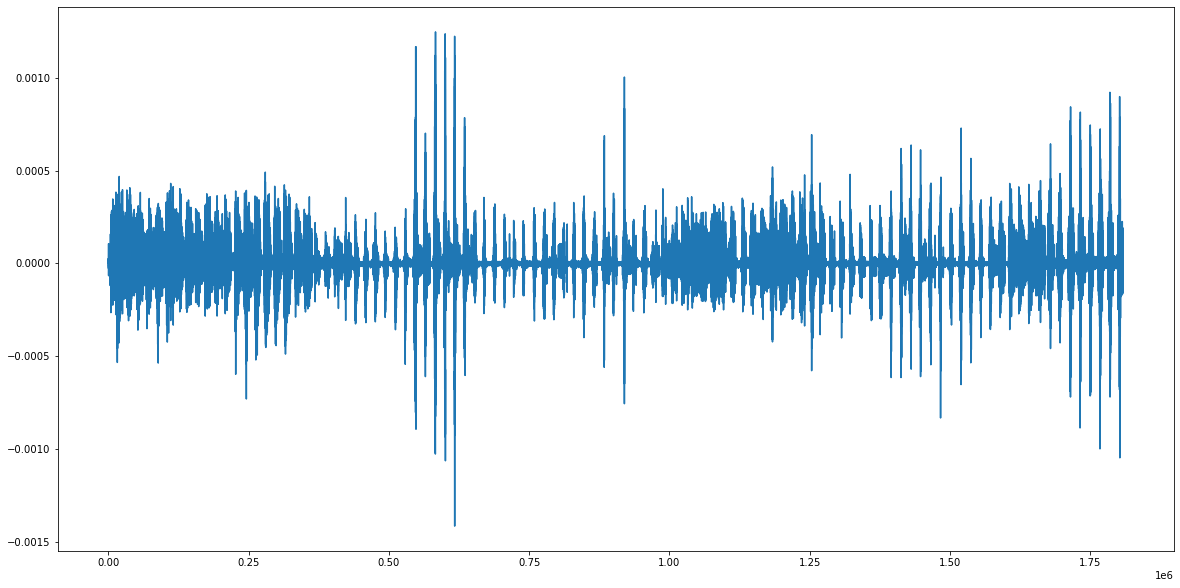

In [11]:
fdf['emg1'].plot(figsize=(20,10))

In [4]:
from nina_helper import *

db2_path = "Ninapro_DB2/"

# Decide window length (150ms window, 10ms increment)
window_len = 20
window_inc = 1

# Choose subject and get info
subject = 1
info_dict = db2_info()  # Get info

data_dict = nina_helper.import_db2(db2_path, subject)

data_dict.keys()

emg_col = []
for i in range(1,13):
    emg_col.append('emg'+str(i))
df = pd.DataFrame(columns=emg_col)
df['move'] = data_dict['move']
df[emg_col] = data_dict['emg']
df

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,emg9,emg10,emg11,emg12,move
0,-2.851210e-06,3.355261e-06,1.598866e-06,-1.394234e-06,-2.082012e-06,2.749975e-06,-2.347791e-06,1.537436e-07,-2.484787e-07,1.469924e-06,-5.609089e-06,0.000040,0
1,-4.697738e-06,3.355212e-06,1.430441e-06,-3.072682e-06,-3.063038e-06,2.246543e-06,-1.657156e-07,2.503453e-06,-3.561109e-07,2.478162e-06,-3.259393e-06,0.000050,0
2,-2.683734e-06,4.026560e-06,9.263165e-07,-5.422526e-06,-3.695910e-06,1.239568e-06,2.352061e-06,5.524560e-06,-2.445606e-07,2.479306e-06,-7.045269e-08,0.000047,0
3,2.183707e-06,2.851566e-06,7.578904e-07,-6.597427e-06,-3.937123e-06,1.575385e-06,2.016400e-06,5.188681e-06,1.094450e-06,2.816148e-06,1.439995e-06,0.000032,0
4,4.197711e-06,6.694763e-07,1.764409e-06,-5.422437e-06,-5.652943e-06,7.362596e-07,8.414949e-07,8.244234e-07,1.154750e-06,2.817293e-06,9.700835e-08,0.000014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238688,-6.230766e-07,5.911040e-07,-5.486231e-06,-1.236290e-06,-2.134746e-06,-2.562491e-06,1.047846e-06,-1.344230e-05,6.216484e-07,-3.767954e-06,1.012069e-06,-0.000022,49
5238689,2.901756e-06,1.766055e-06,-6.493326e-06,-1.404029e-06,-2.187698e-06,-3.401850e-06,1.719439e-06,-2.049242e-05,1.796249e-06,-2.928994e-06,1.179876e-06,-0.000018,49
5238690,4.412399e-06,2.101759e-06,-6.829025e-06,-3.968205e-07,-1.896385e-06,-2.227017e-06,7.125424e-07,-3.073167e-05,1.963753e-06,-1.250788e-06,5.084372e-07,-0.000014,49
5238691,5.251643e-06,1.933917e-06,-5.654080e-06,2.746891e-07,-1.210498e-07,2.906097e-07,-6.300568e-07,-4.751704e-05,9.563120e-07,-7.475257e-07,-1.630021e-07,-0.000012,49


In [6]:
info_dict['rep_labels']

array([1, 2, 3, 4, 5, 6])

In [11]:
from nina_helper import *
import numpy as np
from tqdm.notebook import trange, tqdm

db2_path = "Ninapro_DB2/"

def one_hot(cat_idx,y_all):
    y_hot = []
    for y in y_all:
        if y in cat_idx:
            idx = list(cat_idx).index(y)
            hot = np.zeros(len(cat_idx))
            hot[idx] = 1
            y_hot.append(hot)
    return np.array(y_hot)

def return_singleSubj_prep_data(subject,moves,window_len,window_inc):
    data_dict = nina_helper.import_db2(db2_path, subject, rest_length_cap=5)

    # Create a random test - training split based on repetition number (specify a set to include)
    reps = info_dict['rep_labels']
    nb_test_reps = 2
    nb_splits = 12
#     train_reps, test_reps = gen_split_rand(reps, nb_test_reps, nb_splits, base=[2, 5])
    train_reps, test_reps = gen_split_balanced(reps, nb_test_reps, base=None)

    # Normalise EMG data based on training set
    emg_data = normalise_emg(data_dict['emg'], data_dict['rep'], train_reps[0, :])

    # Window data: x_all data is 4D tensor [observation, time_step, channel, 1] for use with Keras
    # y_all: movement label, length: number of windows
    # r_all: repetition label, length: number of windows
    x_all, y_all, r_all = get_windows(reps, window_len, window_inc,
                                      emg_data, data_dict['move'],
                                      data_dict['rep'],which_moves=moves)

    test_idx = get_idxs(r_all, test_reps[0, :])
    test_data = x_all[test_idx, :, :, :]

    one_hot_categorical = to_categorical(y_all)
#     one_hot_categorical = one_hot(moves,y_all)   # Uncomment this for all except Rest Dataprep
    
    return x_all, y_all, r_all,one_hot_categorical

In [23]:
moves = np.array([9,10,11,12,13,14,15,16,17])
x_all, y_all, r_all,one_hot_categorical = return_singleSubj_prep_data(2,moves,150,75)
x_all.shape

(5667, 150, 12, 1)

In [24]:
one_hot_categorical.shape

(5667, 9)

In [6]:
def return_prep_data(subject_list,moves,window_len,window_inc):
    X,Y,R,Y_hot = return_singleSubj_prep_data(subject_list[0],moves,window_len,window_inc)
    for subject in tqdm(subject_list[1:]):
        x_all, y_all, r_all,one_hot_categorical = return_singleSubj_prep_data(subject,moves,window_len,window_inc)
        X = np.vstack([X,x_all])
        Y = np.hstack([Y,y_all])
        R = np.hstack([R,r_all])
        Y_hot = np.vstack([Y_hot,one_hot_categorical])
    return X,Y,R,Y_hot

# Wrist Motion Dataprep {All 9 Class}

In [7]:
# subject_list = list(range(1,11))
# subject_list = list(range(1,31))
subject_list = list(range(1,41))
moves = np.array([9,10,11,12,13,14,15,16,17])
window_len = 250
window_inc = 50

In [ ]:
wrist_moves = ['Suplination - CW (rot axis Mid finger)',
               'Pronation - CCW (rot axis Mid finger)',
               'Suplination - CW (rot axis lit finger)',
               'Pronation - CCW (rot axis lit finger)',
               'Flexion - Bend Towards',' Extension - Bend Backward',
               'Radial - Left - CCW',
               'Radial - Righ - CW',
               'Extension with closed hand']

In [12]:
X,Y,R,Y_hot = return_prep_data(subject_list,moves,window_len,window_inc)
X.shape

(370616, 250, 12, 1)

In [ ]:
np.save('prepared_data/norest_X_all_wrist_'+str(window_len)+'_'+str(len(subject_list)),X)
np.save('prepared_data/norest_Y_all_wrist_'+str(window_len)+'_'+str(len(subject_list)),Y)
np.save('prepared_data/norest_R_all_wrist_'+str(window_len)+'_'+str(len(subject_list)),R)
np.save('prepared_data/norest_Y_hot_all_wrist_'+str(window_len)+'_'+str(len(subject_list)),Y_hot)

File Coding - X_all_motion_windowLen_no.subjects

# Grasping Motion Dataprep {Rest,All Grasp} Converted to Binary{Rest/Grasp}

In [8]:
# subject_list = list(range(1,31))
subject_list = list(range(1,41))
moves = np.array([0,27,28,29,33,35,37,38])
window_len = 250
window_inc = 50

In [9]:
X_grasp,Y_grasp,R_grasp,Y_hot_grasp = return_prep_data(subject_list,moves,window_len,window_inc)
X_grasp.shape

(2157484, 250, 12, 1)

In [10]:
np.save('prepared_data/X_all_grasp_'+str(window_len)+'_'+str(len(subject_list)),X_grasp)
np.save('prepared_data/Y_all_grasp_'+str(window_len)+'_'+str(len(subject_list)),Y_grasp)
np.save('prepared_data/R_all_grasp_'+str(window_len)+'_'+str(len(subject_list)),R_grasp)
np.save('prepared_data/Y_hot_all_grasp_'+str(window_len)+'_'+str(len(subject_list)),Y_hot_grasp)

## Pronation/Supplination Dataprep

In [9]:
# subject_list = list(range(1,31))
subject_list = list(range(1,41))
moves = np.array([9,10,11,12])
window_len = 250
window_inc = 50
print(window_len,window_inc)

250 50


In [10]:
labels = ['Suplination - CW (rot axis Mid finger)',
           'Pronation - CCW (rot axis Mid finger)',
           'Suplination - CW (rot axis lit finger)',
           'Pronation - CCW (rot axis lit finger)']

In [11]:
X_ProSup,Y_ProSup,R_ProSup,Y_hot_ProSup = return_prep_data(subject_list,moves,window_len,window_inc)
X_ProSup.shape

(186012, 250, 12, 1)

In [12]:
np.save('prepared_data/X_all_ProSup_'+str(window_len)+'_'+str(len(subject_list)),X_ProSup)
np.save('prepared_data/Y_all_ProSup_'+str(window_len)+'_'+str(len(subject_list)),Y_ProSup)
np.save('prepared_data/R_all_ProSup_'+str(window_len)+'_'+str(len(subject_list)),R_ProSup)
np.save('prepared_data/Y_hot_all_ProSup_'+str(window_len)+'_'+str(len(subject_list)),Y_hot_ProSup)

## Radial/Ulnar

In [12]:
# subject_list = list(range(1,31))
subject_list = list(range(1,41))
moves = np.array([15,16])

window_len = 250
window_inc = 50

In [13]:
labels = ['Radial - CCW','Ulnar - CW',]

In [14]:
X_radial,Y_radial,R_radial,Y_hot_radial = return_prep_data(subject_list,moves,window_len,window_inc)
X_radial.shape

(83114, 250, 12, 1)

In [15]:
np.save('prepared_data/X_all_Radial_'+str(window_len)+'_'+str(len(subject_list)),X_radial)
np.save('prepared_data/Y_all_Radial_'+str(window_len)+'_'+str(len(subject_list)),Y_radial)
np.save('prepared_data/R_all_Radial_'+str(window_len)+'_'+str(len(subject_list)),R_radial)
np.save('prepared_data/Y_hot_all_Radial_'+str(window_len)+'_'+str(len(subject_list)),Y_hot_radial)

## Flexion/Extension Dataprep

In [16]:
# subject_list = list(range(1,31))
subject_list = list(range(1,41))
moves = np.array([13,14])

window_len = 250
window_inc = 50

In [17]:
labels = ['Flexion - Bend Towards',
          'Extension - Bend Backward']

In [18]:
X_FlexEx,Y_FlexEx,R_FlexEx,Y_hot_FlexEx = return_prep_data(subject_list,moves,window_len,window_inc)
X_FlexEx.shape

(67284, 250, 12, 1)

In [19]:
np.save('prepared_data/X_all_FlexEx_'+str(window_len)+'_'+str(len(subject_list)),X_FlexEx)
np.save('prepared_data/Y_all_FlexEx_'+str(window_len)+'_'+str(len(subject_list)),Y_FlexEx)
np.save('prepared_data/R_all_FlexEx_'+str(window_len)+'_'+str(len(subject_list)),R_FlexEx)
np.save('prepared_data/Y_hot_all_FlexEx_'+str(window_len)+'_'+str(len(subject_list)),Y_hot_FlexEx)

## Rest/Motion Dataprep

In [12]:
# subject_list = list(range(1,31))
subject_list = list(range(1,41))
moves = None

window_len = 250
window_inc = 50

In [13]:
labels = ['Rest',
          'Motion']

In [14]:
X_rest,Y_rest,R_rest,Y_hot_rest = return_prep_data(subject_list,moves,window_len,window_inc)
X_rest.shape

MemoryError: Unable to allocate 38.4 GiB for an array with shape (3432130, 250, 12, 1) and data type float32

In [ ]:
np.save('prepared_data/X_all_rest_'+str(window_len)+'_'+str(len(subject_list)),X_rest)
np.save('prepared_data/Y_all_rest_'+str(window_len)+'_'+str(len(subject_list)),Y_rest)
np.save('prepared_data/R_all_rest_'+str(window_len)+'_'+str(len(subject_list)),R_rest)
np.save('prepared_data/Y_hot_all_rest_'+str(window_len)+'_'+str(len(subject_list)),Y_hot_rest)